# Generierung von Bitmaps aus Zufallszahlen

*(Stellt sich als Schuss in den Ofen heraus, da viel zu wenige Bits (bzw. Bytes mit Graustufen) dargestellt werden können.)*

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (7,7)
plt.rcParams["figure.dpi"] = 70

## Bitmap

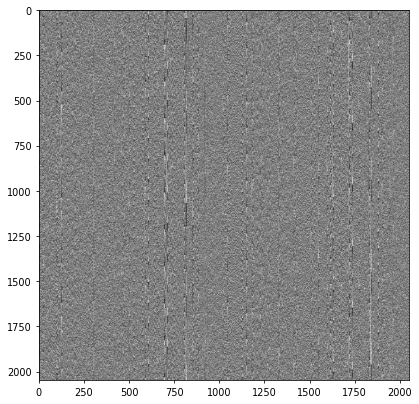

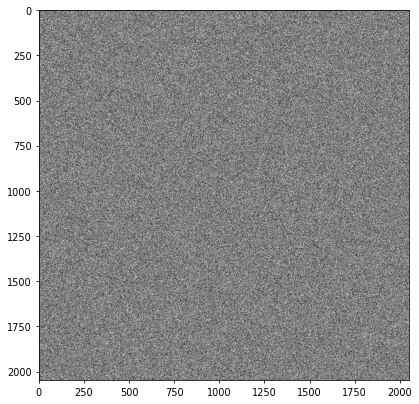

In [2]:
def draw_bitmap(bytes):
    bits = ""
    for byte in bytes:
        bits += bin(byte)[2:].zfill(8)

    bits = np.array(list(map(int, bits)))

    def f(bit):
        if bit == 1:
            return [1.,1.,1.]
        else:
            return [0.,0.,0.]

    img = np.array(list(map(f, bits)))[:2048*2048].reshape(2048,2048,3)

    plt.imshow(img)
    plt.show()

with open("resources/lcg_mod16777216_a315_c1.dat", "rb") as f:
    random_data = f.read()
    draw_bitmap(random_data)
with open("resources/lcg_mod2147483647_a48271_c0.dat", "rb") as f:
    random_data = f.read()
    draw_bitmap(random_data)
with open("resources/random_qrng.dat", "rb") as f:
    random_data = f.read()
    draw_bitmap(random_data)

## "Bytemap"

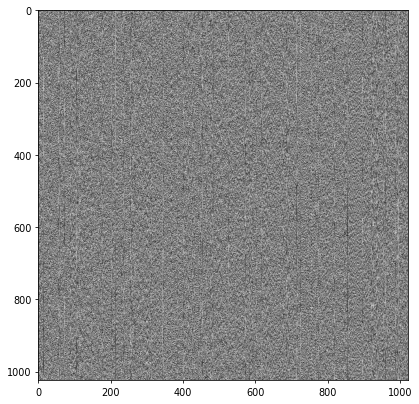

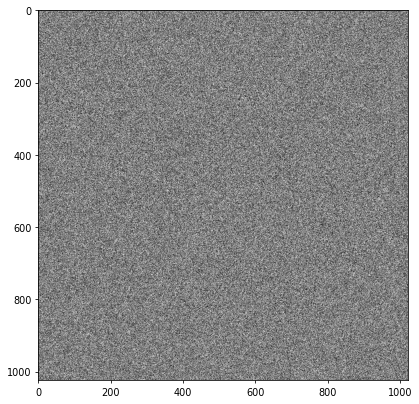

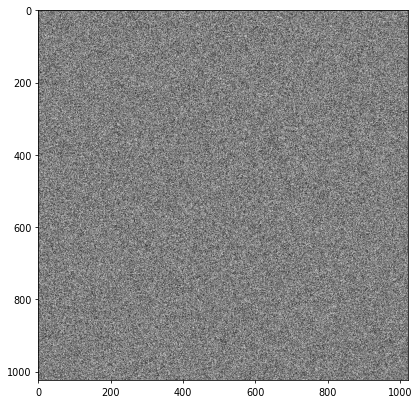

In [3]:
def draw_bytemap(bytes):
    floats = np.interp(bytes[: 1024 * 1024], [0, 255], [0, 1])

    def f(float):
        return [float, float, float]

    img = np.array(list(map(f, floats))).reshape(1024, 1024, 3)

    plt.imshow(img)
    plt.show()

bytes = np.fromfile("resources/lcg_mod16777216_a315_c1.dat", dtype=np.uint8)
draw_bytemap(bytes)
bytes = np.fromfile("resources/lcg_mod2147483647_a48271_c0.dat", dtype=np.uint8)
draw_bytemap(bytes)
bytes = np.fromfile("resources/random_qrng.dat", dtype=np.uint8)
draw_bytemap(bytes)